# Kmeans Algorithm on Crime dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings("ignore")

In [2]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
crime2=crime.drop(['Unnamed: 0'],axis=1)
crime2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [4]:
crime2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [5]:
crime2_norm=pd.DataFrame(normalize(crime2),columns=crime2.columns)
crime2_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


In [6]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(crime2_norm)
    wcss.append(kmeans.inertia_)

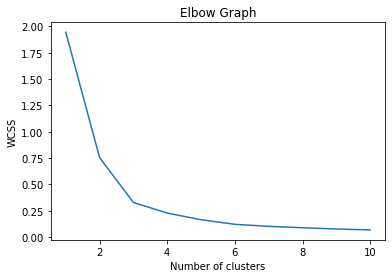

In [7]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Build Cluster algorithm using K=4

In [8]:
clusters4=KMeans(2,random_state=30).fit(crime2_norm)
clusters4

KMeans(n_clusters=2, random_state=30)

In [9]:
clusters4.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0])

In [10]:
crime4=crime2.copy()
crime4['clusters4id']=clusters4.labels_
crime4

,Murder,Assault,UrbanPop,Rape,clusters4id
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [11]:
clusters4.cluster_centers_

array([[0.04393273, 0.9363232 , 0.31356124, 0.1123474 ],
       [0.03435785, 0.77567842, 0.59611771, 0.13291602]])

In [12]:
crime4.groupby('clusters4id').agg(['mean']).reset_index()

,clusters4id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,9.696970,211.636364,65.181818,24.475758
1,1,4.082353,91.411765,66.235294,14.935294


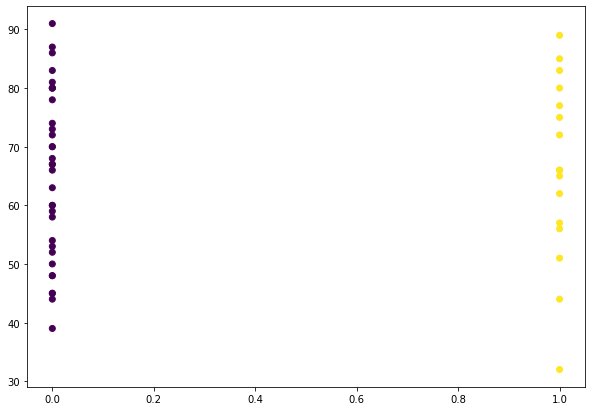

In [13]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime4['clusters4id'],crime4['UrbanPop'], c=clusters4.labels_) 

Build Cluster algorithm using K=3

In [14]:
clusters5=KMeans(3,random_state=30).fit(crime2_norm)
clusters5

KMeans(n_clusters=3, random_state=30)

In [15]:
clusters5.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1,
       2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 2, 1])

In [16]:
crime5=crime2.copy()
crime5['clusters5id']=clusters5.labels_
crime5

,Murder,Assault,UrbanPop,Rape,clusters5id
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1


In [17]:
clusters5.cluster_centers_

array([[0.03824062, 0.86500142, 0.47897132, 0.12490787],
       [0.04544868, 0.95210555, 0.27128802, 0.10877231],
       [0.02971377, 0.65577288, 0.73186384, 0.14305726]])

In [18]:
crime5.groupby('clusters5id').agg(['mean']).reset_index()

,clusters5id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.020000,117.950000,64.600000,16.635000
1,1,11.387500,243.750000,67.208333,27.287500
2,2,2.616667,54.833333,62.000000,12.333333


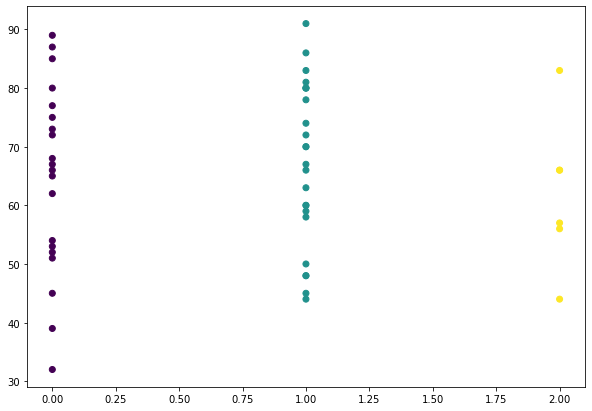

In [19]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime5['clusters5id'],crime5['UrbanPop'], c=clusters5.labels_) 

# DBSCAN Algorithm on Crime dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [21]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [22]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [23]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [24]:
crime_norm=StandardScaler().fit_transform(crime)
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [25]:
dbscan=DBSCAN(eps=1,min_samples=4) # earlier eps=1
dbscan.fit(crime_norm)

DBSCAN(eps=1, min_samples=4)

In [26]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [27]:
crime['clusters']=dbscan.labels_
crime

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [28]:
crime.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


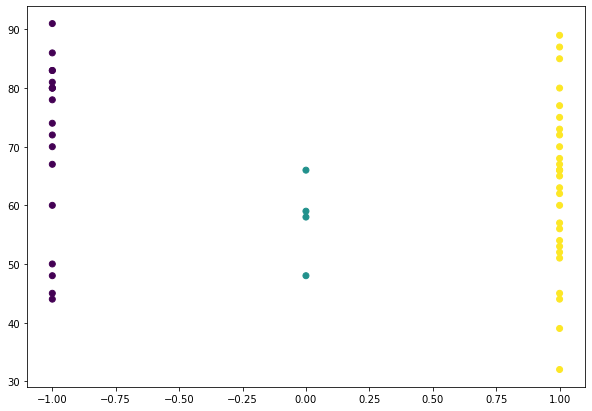

In [29]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime['clusters'],crime['UrbanPop'], c=dbscan.labels_) 

# Clustering-Hierarchical (Airlines)

In [30]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings("ignore")

In [31]:
crime=pd.read_csv('crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [32]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [33]:
crime2=crime.drop(['Unnamed: 0'],axis=1)
crime2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [34]:
# Normalize heterogenous numerical data using z-score (x-mean/std) or custom defined function 
# Normalization function - here custom defined
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [35]:
# Normalized data frame (considering the numerical part of data)
crime2_norm = norm_func(crime2)
crime2_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


##   Hierarchical Clustering

* Hierarchical clustering, as the name suggests is an algorithm that builds hierarchy of clusters. This algorithm starts with all the data points assigned to a cluster of their own. Then two nearest clusters are merged into the same cluster. In the end, this algorithm terminates when there is only a single cluster left.

* The results of hierarchical clustering can be shown using dendrogram.

* The decision of the no. of clusters that can best depict different groups can be chosen by observing the dendrogram. The best choice of the no. of clusters is the no. of vertical lines in the dendrogram cut by a horizontal line that can transverse the maximum distance vertically without intersecting a cluster.


### Two important things that we should know about hierarchical clustering are:

* This algorithm has been implemented above using bottom up approach. It is also possible to follow top-down approach starting with all data points assigned in the same cluster and recursively performing splits till each data point is assigned a separate cluster.

* The decision of merging two clusters is taken on the basis of closeness of these clusters. 



#### There are multiple metrics for deciding the closeness of two clusters :

* Euclidean distance: ||a-b||2 = √(Σ(ai-bi))
* Squared Euclidean distance: ||a-b||22 = Σ((ai-bi)2)
* Manhattan distance: ||a-b||1 = Σ|ai-bi|
* Maximum distance:||a-b||INFINITY = maxi|ai-bi|
* Mahalanobis distance: √((a-b)T S-1 (-b))   {where, s : covariance matrix}



> The advantage of this technique is that it can handle huge number of observations and takes very less time compared to all other available techniques. 

>The disadvantage of the technique is that changing the process in between to club data-points to the second best cluster is not possible. Hence, the method is much more rigid when compared to  Hierarchical Clustering.

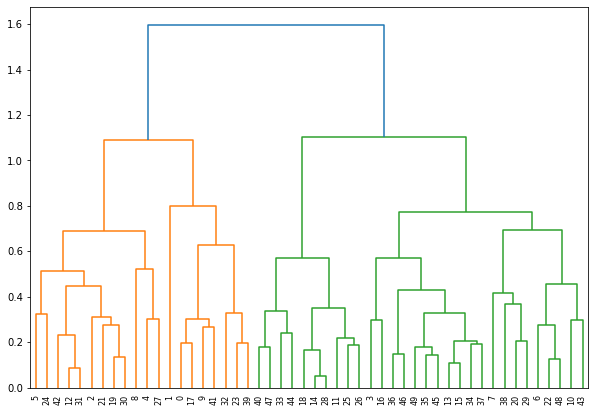

In [36]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(crime2_norm,'complete'))

In [37]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=3)

In [38]:
y=pd.DataFrame(hclusters.fit_predict(crime2_norm),columns=['clustersid'])
y

,clustersid
0,0
1,0
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,0


In [39]:
y['clustersid'].value_counts()

0    20
1    18
2    12
Name: clustersid, dtype: int64

In [40]:
# Adding clusters to dataset
crime2['clustersid']=hclusters.labels_
crime2

,Murder,Assault,UrbanPop,Rape,clustersid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [41]:
crime2.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,12.165000,255.250000,68.400000,29.165000
1,1,6.055556,140.055556,71.333333,18.683333
2,2,3.091667,76.000000,52.083333,11.833333


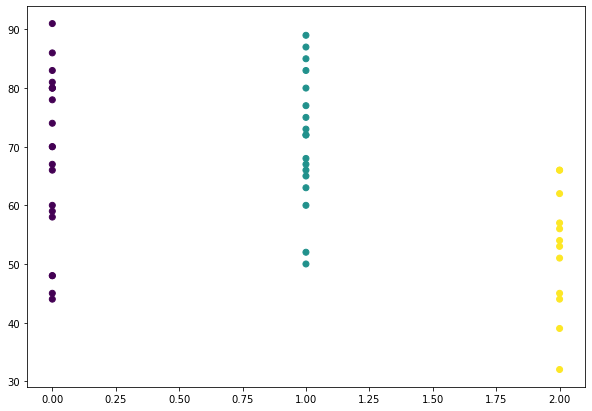

In [42]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime2['clustersid'],crime2['UrbanPop'], c=hclusters.labels_) 

# Observation: 

## Thus if we achived the same no . of cluster (i.e 3)from all the above three algorithms  and then draw  the scatter plot between cluster Id and UrbanPop then we can see that all the algorithms gives the almost same distribution among the same no of cluters